In [21]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

fname0 = 'output/soilwater_19850101-20221231_monthly_52.5_1.25.nc'
fname = 'output/soilwater_20200101-20221231_hourly_52.5_1.25.nc'

In [5]:
ds=xr.open_dataset(fname0).isel(expver=0).mean(('latitude','longitude')).drop_vars('expver')
ds_short = xr.open_dataset(fname).squeeze().to_dataframe().resample('D').mean().to_xarray()
ds

<xarray.Dataset>
Dimensions:  (time: 456)
Coordinates:
  * time     (time) datetime64[ns] 1985-01-01 1985-02-01 ... 2022-12-01
Data variables:
    swvl2    (time) float32 0.351 0.3366 0.3398 0.3432 ... 0.2886 0.3587 nan
    swvl4    (time) float32 0.3052 0.3151 0.3205 0.3251 ... 0.3008 0.2988 nan
    swvl3    (time) float32 0.3355 0.3474 0.3356 0.3464 ... 0.2162 0.2931 nan
    swvl1    (time) float32 0.3504 0.3326 0.3441 0.3408 ... 0.3069 0.3624 nan

In [29]:
df = ds_short.to_dataframe()
for i in df.index:
    print(i)

2020-01-01 00:00:00
2020-01-02 00:00:00
2020-01-03 00:00:00
2020-01-04 00:00:00
2020-01-05 00:00:00
2020-01-06 00:00:00
2020-01-07 00:00:00
2020-01-08 00:00:00
2020-01-09 00:00:00
2020-01-10 00:00:00
2020-01-11 00:00:00
2020-01-12 00:00:00
2020-01-13 00:00:00
2020-01-14 00:00:00
2020-01-15 00:00:00
2020-01-16 00:00:00
2020-01-17 00:00:00
2020-01-18 00:00:00
2020-01-19 00:00:00
2020-01-20 00:00:00
2020-01-21 00:00:00
2020-01-22 00:00:00
2020-01-23 00:00:00
2020-01-24 00:00:00
2020-01-25 00:00:00
2020-01-26 00:00:00
2020-01-27 00:00:00
2020-01-28 00:00:00
2020-01-29 00:00:00
2020-01-30 00:00:00
2020-01-31 00:00:00
2020-02-01 00:00:00
2020-02-02 00:00:00
2020-02-03 00:00:00
2020-02-04 00:00:00
2020-02-05 00:00:00
2020-02-06 00:00:00
2020-02-07 00:00:00
2020-02-08 00:00:00
2020-02-09 00:00:00
2020-02-10 00:00:00
2020-02-11 00:00:00
2020-02-12 00:00:00
2020-02-13 00:00:00
2020-02-14 00:00:00
2020-02-15 00:00:00
2020-02-16 00:00:00
2020-02-17 00:00:00
2020-02-18 00:00:00
2020-02-19 00:00:00


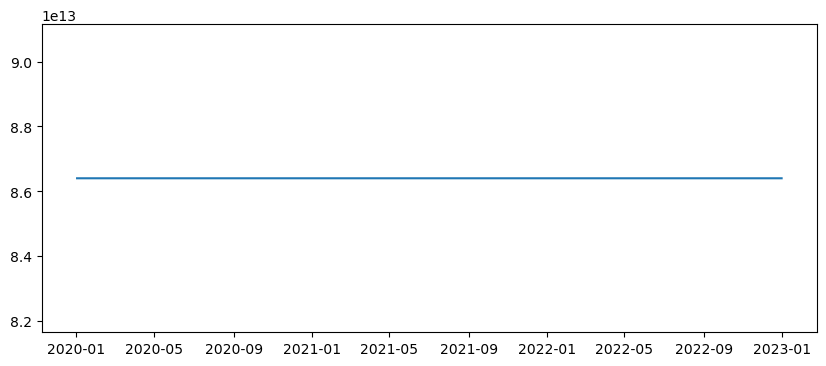

In [25]:
fig,ax = plt.subplots(figsize=(10,4))
ax.plot(df.index[1:],np.diff(df.index))

In [ ]:
def to_dekads(df: pd.DataFrame) -> pd.DataFrame:
    

In [33]:
ds_mean = ds.mean('time')
ds_std = ds.std('time')

zscores = ((ds_short - ds_mean)/ds_std).rename({'swvl1': 'swvl1_zscore','swvl2': 'swvl2_zscore','swvl3': 'swvl3_zscore','swvl4': 'swvl4_zscore'})

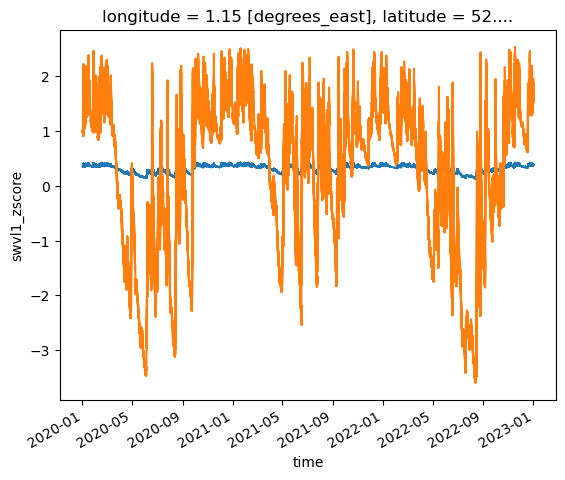

In [39]:
df_sma = xr.merge([ds_short,zscores])
df_sma.swvl1.plot()
df_sma.swvl1_zscore.plot()

In [43]:
pth = 'output\soilwater_20200101-20221231_hourly_52.5_1.25.nc'
hourly_swv = xr.open_dataset(pth).squeeze()
hourly_swv

<xarray.Dataset>
Dimensions:    (time: 26304)
Coordinates:
    longitude  float32 1.15
    latitude   float32 52.4
  * time       (time) datetime64[ns] 2020-01-01T07:00:00 ... 2022-12-31T01:00:00
Data variables:
    swvl2      (time) float32 ...
    swvl4      (time) float32 ...
    swvl3      (time) float32 ...
    swvl1      (time) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2023-03-30 16:14:41 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [49]:
daily_swv = hourly_swv.drop_vars(['latitude','longitude']).to_dataframe().resample('D').mean().to_xarray()

In [41]:
np.linspace(1,31) // 10

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 3., 3.])

In [60]:
df = ds_short.drop_vars(['latitude','longitude']).to_dataframe()
swv_dekads = to_dekads(df)

# Calculate zscores
for n in [1,2,3,4]:
    layer = 'swvl' + str(n)
    swv_dekads['zscore_' + layer] = ((swv_dekads[layer] - 0.3) / 0.06)


In [68]:
for layer in [1,2,3,4]:
    col = 'swvl' + str(layer)
    swv_dekads['zscore_' + col] = ((swv_dekads[col] - swv_mean[col].item()) / swv_std[col].item())

In [44]:
def to_dekads(df):
    d = df.index.day - np.clip((df.index.day-1) // 10, 0, 2)*10 - 1
    date = df.index.values - np.array(d, dtype="timedelta64[D]")
    return df.groupby(date).mean()

In [28]:
date = df.index.values - np.array(d, dtype="timedelta64[D]")
df.groupby(date).mean()

C:\Users\jenni\AppData\Local\Temp\ipykernel_14532\1911755765.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  begin = pd.datetime(2013,1,1)
C:\Users\jenni\AppData\Local\Temp\ipykernel_14532\1911755765.py:4: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  end = pd.datetime(2013,2,20)


,p1,p2
2013-01-01,5.811632,10.758510
2013-01-02,5.994713,10.374616
2013-01-03,5.012504,10.706024
2013-01-04,5.076557,10.207803
2013-01-05,5.306825,10.790871
2013-01-06,5.597500,10.619979
2013-01-07,5.600731,10.215370
2013-01-08,5.489858,10.688820
2013-01-09,5.270770,10.721033
2013-01-10,5.716212,10.467220
